# Heart Disease Prediction

In [54]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.utils import resample
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, roc_curve, classification_report, precision_score, recall_score, roc_auc_score, auc
from sklearn.model_selection import RandomizedSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB



data = pd.read_csv(r'C:\Users\Matías\Documents\DH\hearth\framingham.csv')
data.head()


,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


**Nuestro objetivo es predecir si el paciente NO posee un riesgo de 10 años de enfermedad coronaria futura. El conjunto de datos proporciona la información de los pacientes. Incluye más de 4000 registros y 15 variables.**

**Variables**

***Demográfico:***

• Male: masculino (1) o femenino (0) (nominal)

• Age: edad del paciente; (continua: aunque las edades registradas se han truncado a números enteros, el concepto de edad es continuo)

***Conductual***

• Current Smoker: si el paciente es fumador actual o no (nominal)

• Cigs Per Day: la cantidad de cigarrillos que la persona fumó en promedio en un día (se puede considerar continuo ya que se puede fumar cualquier cantidad de cigarrillos, incluso medio cigarrillo).
Historial médico)

• BP Meds: si el paciente estaba o no tomando medicación para la presión arterial (nominal)

• Prevalent Stroke: si el paciente había tenido previamente un accidente cerebrovascular o no (nominal)

• Prevalent Hyp: si el paciente era hipertenso o no (nominal)

• Diabetes: si el paciente tenía diabetes o no (nominal)

***Médico (actual)***

• Tot Chol: nivel de colesterol total (continuo)

• Sys BP: presión arterial sistólica (continua)

• Dia BP: presión arterial diastólica (continua)

• IMC: índice de masa corporal (continuo)

• Heart Rate: frecuencia cardíaca (continua: en la investigación médica, variables como la frecuencia cardíaca, aunque de hecho son discretas, se consideran continuas debido a la gran cantidad de valores posibles).

• Glucose: nivel de glucosa (continuo)

***Predecir variable (objetivo deseado)***

• 10 year risk of coronary heart disease CHD (binario: "1", significa "Sí", "0" significa "No")


In [2]:
print(data.shape)
print(data.isnull().sum())

(4238, 16)
male                 0
age                  0
education          105
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64


In [3]:
data.isna().sum()

male                 0
age                  0
education          105
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64

In [4]:
data.dropna()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4231,1,58,3.0,0,0.0,0.0,0,1,0,187.0,141.0,81.0,24.96,80.0,81.0,0
4232,1,68,1.0,0,0.0,0.0,0,1,0,176.0,168.0,97.0,23.14,60.0,79.0,1
4233,1,50,1.0,1,1.0,0.0,0,1,0,313.0,179.0,92.0,25.97,66.0,86.0,1
4234,1,51,3.0,1,43.0,0.0,0,0,0,207.0,126.5,80.0,19.71,65.0,68.0,0


# Exploración de datos

In [5]:
#Verificamos si tenemos rows duplicadas
duplicado = data.duplicated()
print(duplicado.any())
print(data[duplicado])
print(data.shape)
data.drop_duplicates(inplace=True)
print(data.shape)

False
Empty DataFrame
Columns: [male, age, education, currentSmoker, cigsPerDay, BPMeds, prevalentStroke, prevalentHyp, diabetes, totChol, sysBP, diaBP, BMI, heartRate, glucose, TenYearCHD]
Index: []
(4238, 16)
(4238, 16)


In [6]:
data.TenYearCHD.describe()

count    4238.000000
mean        0.151958
std         0.359023
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         1.000000
Name: TenYearCHD, dtype: float64

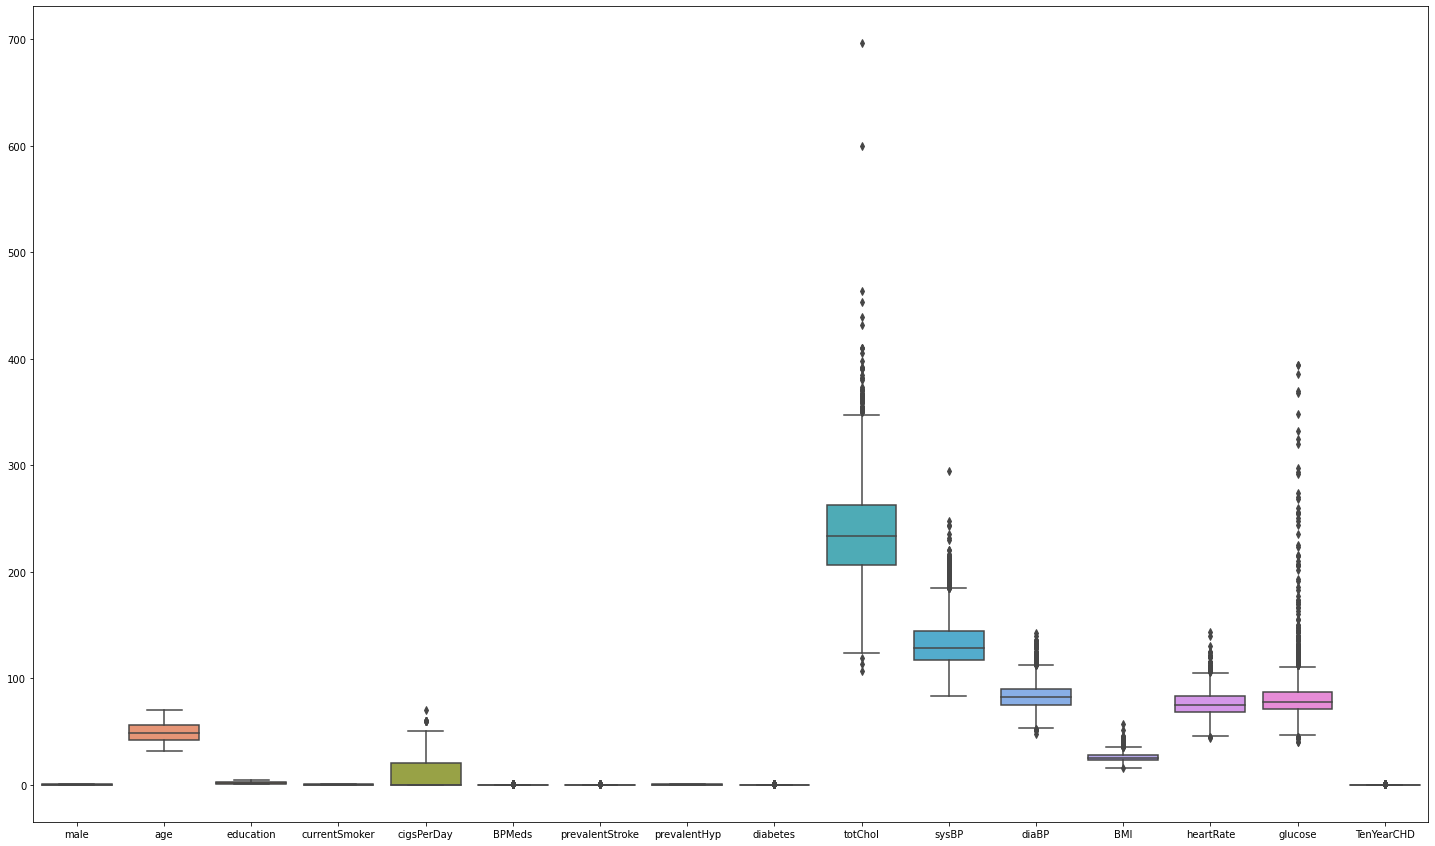

In [7]:
plt.figure(figsize=(25,15), facecolor='w')
sns.boxplot(data=data)
plt.show()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
male,1.000000,-0.028979,0.017352,0.197596,0.317930,-0.052506,-0.004546,0.005313,0.015708,-0.070322,-0.035989,0.057933,0.081672,-0.116620,0.006083,0.088428
age,-0.028979,1.000000,-0.165883,-0.213748,-0.192791,0.122995,0.057655,0.307194,0.101258,0.262131,0.394302,0.206104,0.135800,-0.012823,0.122256,0.225256
education,0.017352,-0.165883,1.000000,0.018532,0.008085,-0.010815,-0.035112,-0.081970,-0.038680,-0.023115,-0.129631,-0.062316,-0.137504,-0.054206,-0.035721,-0.054059
currentSmoker,0.197596,-0.213748,0.018532,1.000000,0.769690,-0.048938,-0.032988,-0.103260,-0.044295,-0.046562,-0.130230,-0.107746,-0.167650,0.062356,-0.056826,0.019456
cigsPerDay,0.317930,-0.192791,0.008085,0.769690,1.000000,-0.046134,-0.032707,-0.066146,-0.037067,-0.026320,-0.088780,-0.056632,-0.092856,0.075157,-0.058960,0.057884
BPMeds,-0.052506,0.122995,-0.010815,-0.048938,-0.046134,1.000000,0.117365,0.261187,0.052047,0.080558,0.254219,0.194227,0.100668,0.015233,0.051176,0.087489
prevalentStroke,-0.004546,0.057655,-0.035112,-0.032988,-0.032707,0.117365,1.000000,0.074830,0.006949,0.000067,0.057009,0.045190,0.025891,-0.017676,0.018431,0.061810
prevalentHyp,0.005313,0.307194,-0.081970,-0.103260,-0.066146,0.261187,0.074830,1.000000,0.077808,0.163993,0.696755,0.615751,0.301318,0.147261,0.086834,0.177603
diabetes,0.015708,0.101258,-0.038680,-0.044295,-0.037067,0.052047,0.006949,0.077808,1.000000,0.040278,0.111283,0.050329,0.087036,0.048994,0.617627,0.097317
totChol,-0.070322,0.262131,-0.023115,-0.046562,-0.026320,0.080558,0.000067,0.163993,0.040278,1.000000,0.208908,0.165182,0.115767,0.091125,0.046408,0.082184


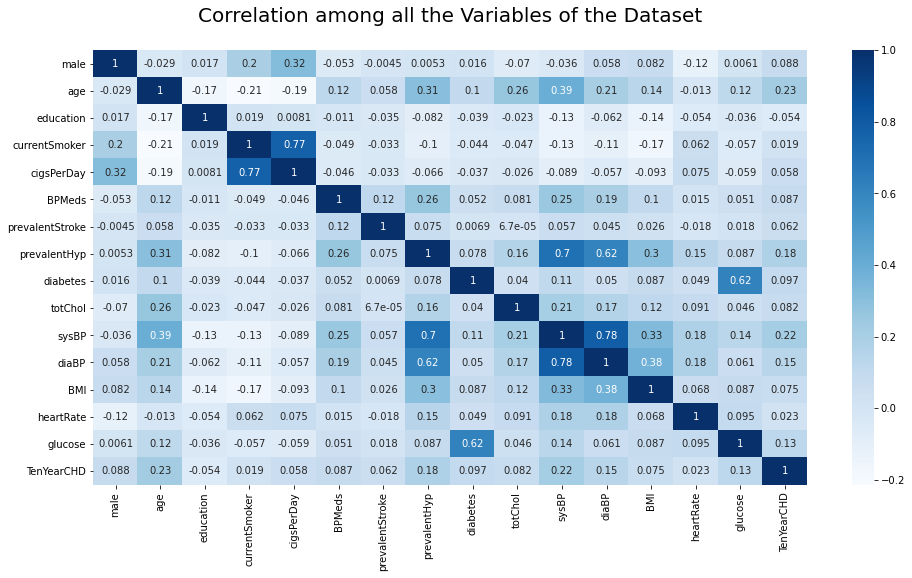

In [8]:
#Checking relationship between variables
cor=data.corr()
plt.figure(figsize=(16,8), facecolor='w')
sns.heatmap(cor,xticklabels=cor.columns,yticklabels=cor.columns,annot=True, cmap="Blues")
plt.title("Correlation among all the Variables of the Dataset\n", size=20)
cor

In [9]:
#Esta función me permite resolver el error:
#sklearn error ValueError: Input contains NaN, infinity or a value too large for dtype('float64')

def clean_dataset(data):
    assert isinstance(data, pd.DataFrame), "df needs to be a pd.DataFrame"
    data.dropna(inplace=True)
    indices_to_keep = ~data.isin([np.nan, np.inf, -np.inf]).any(1)
    return data[indices_to_keep].astype(np.float64)

In [10]:
#Uso la función creada y le paso como argumento el dataset
clean_dataset(data)

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1.0,39.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,195.0,106.0,70.0,26.97,80.0,77.0,0.0
1,0.0,46.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,250.0,121.0,81.0,28.73,95.0,76.0,0.0
2,1.0,48.0,1.0,1.0,20.0,0.0,0.0,0.0,0.0,245.0,127.5,80.0,25.34,75.0,70.0,0.0
3,0.0,61.0,3.0,1.0,30.0,0.0,0.0,1.0,0.0,225.0,150.0,95.0,28.58,65.0,103.0,1.0
4,0.0,46.0,3.0,1.0,23.0,0.0,0.0,0.0,0.0,285.0,130.0,84.0,23.10,85.0,85.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4231,1.0,58.0,3.0,0.0,0.0,0.0,0.0,1.0,0.0,187.0,141.0,81.0,24.96,80.0,81.0,0.0
4232,1.0,68.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,176.0,168.0,97.0,23.14,60.0,79.0,1.0
4233,1.0,50.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,313.0,179.0,92.0,25.97,66.0,86.0,1.0
4234,1.0,51.0,3.0,1.0,43.0,0.0,0.0,0.0,0.0,207.0,126.5,80.0,19.71,65.0,68.0,0.0


In [11]:
#Categorical features = train_cols 
train_cols = ['male','currentSmoker', 'BPMeds', 'prevalentStroke', 'prevalentHyp', 'diabetes']
X = data[train_cols]
y = data['TenYearCHD']

In [12]:
y.value_counts()

0    3099
1     557
Name: TenYearCHD, dtype: int64

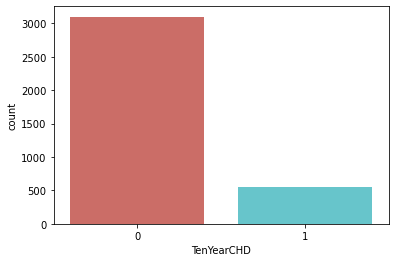

In [13]:
sns.countplot(x=y, data=data, palette='hls')
plt.show()

Podemos observar que las clases de este dataset no están balanceadas, hay 3099 casos NO y 557 casos SI. Por lo tanto, decidimos balancearlo.

In [14]:
data.groupby(y).mean()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose
TenYearCHD,,,,,,,,,,,,,,,
0,0.424330,48.708938,2.007099,0.484995,8.758632,0.023879,0.004195,0.275895,0.020652,235.169732,130.280736,82.148919,25.642975,75.626331,80.620200
1,0.551167,54.278276,1.827648,0.511670,10.488330,0.066427,0.014363,0.509874,0.062837,246.350090,143.981149,87.157989,26.569838,76.310592,88.732496


Observamos que las personas con 10 años de riesgos de padecimiento de una enfermedad coronaria contienen ciertos valores por encima de quienes no poseen ese riesgo.

In [15]:
#Agrupamos por la variable Male, la cual nos indica si el paciente es hombre o mujer. Observamos que es un dato balanceado.
#El 1 indica hombres y el 0 mujeres. Se observa que la media de hombres se con riesgo a contraer una enfermedad cardiovascular
#es mayor a la media de mujeres. Estos datos tienen sentido si pensamos en variables como el consumo de tabaco, el cual es
#superior en los hombres a las mujeres.
data.groupby('male').mean()

,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
male,,,,,,,,,,,,,,,
0,49.743854,1.963618,0.396755,5.497050,0.038348,0.005900,0.311209,0.025074,239.638151,133.265241,82.360619,25.519651,76.960177,81.791052,0.122911
1,49.323674,2.000000,0.604809,13.442663,0.020345,0.005549,0.311961,0.029593,233.405672,131.242910,83.603576,26.115912,74.188656,81.937731,0.189273


In [16]:
#Agrupamos por la variable current smoker, la cual nos dice si el paciente es fumador o no.
data.groupby('currentSmoker').mean()

,male,age,education,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
currentSmoker,,,,,,,,,,,,,,,
0,0.343148,51.323340,1.954497,0.000000,0.039079,0.008565,0.360278,0.033726,239.078158,135.271949,84.267934,26.418865,75.139186,83.103854,0.145610
1,0.548658,47.712528,2.006152,18.447987,0.021253,0.002796,0.260626,0.020134,234.569351,129.334172,81.495526,25.121107,76.348434,80.552573,0.159396


In [17]:
#Agrupamos por la variable BPMeds, la cual nos dice si la persona toma medicación para la presión arterial. Observamos que
#nuestros datos reflejan que hay una menor cantidad de hombres que se encuetran medicados frente a las mujeres. Se podría 
#pensar que al estar medicados, disminuyen el riesgo de contraer una enfermedad cardiovascular.
data.groupby('BPMeds').mean()

,male,age,education,currentSmoker,cigsPerDay,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
BPMeds,,,,,,,,,,,,,,,
0.0,0.448237,49.353456,1.982228,0.493653,9.120169,0.004231,0.289986,0.025670,236.139633,131.307616,82.488858,25.708217,75.703244,81.626798,0.146685
1.0,0.297297,56.072072,1.900901,0.342342,5.891892,0.054054,1.000000,0.072072,260.297297,166.234234,96.427928,28.210360,76.603604,89.180180,0.333333


In [18]:
#Agrupamos por la variable Prevalent Stroke indica si el paciente tuvo anteriormente un ACV o no. Obsevamos que la cantidad
#de 
data.groupby('prevalentStroke').mean()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
prevalentStroke,,,,,,,,,,,,,,,
0,0.443741,49.524347,1.982118,0.490509,9.055021,0.028886,0.309216,0.026960,236.830536,132.265475,82.861210,25.772913,75.746080,81.826960,0.151032
1,0.428571,55.285714,1.571429,0.238095,3.333333,0.285714,0.714286,0.047619,244.238095,150.119048,91.714286,27.735238,73.047619,86.904762,0.380952


In [19]:
#Agrupamos por la variable Prevalent Hyp, la cual indica si el paciente era hipertenso/a o no.
data.groupby('prevalentHyp').mean()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
prevalentHyp,,,,,,,,,,,,,,,
0,0.443385,47.791418,2.034168,0.525228,9.582439,0.000000,0.002384,0.018276,231.917759,121.999205,77.937426,24.955781,74.543107,80.454907,0.108462
1,0.444249,53.460053,1.859526,0.409131,7.784021,0.097454,0.013169,0.046532,247.823529,155.281387,93.905180,27.614820,78.354697,84.952590,0.249342


In [20]:
#Agrupamos por la variabl, la cual indica si el paciente posee dicha patología o no.
data.groupby('diabetes').mean()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
diabetes,,,,,,,,,,,,,,,
0,0.442508,49.401743,1.986505,0.492550,9.095586,0.028957,0.005623,0.305313,236.517290,131.990020,82.810655,25.723843,75.608659,79.403992,0.146753
1,0.484848,55.151515,1.737374,0.363636,6.383838,0.080808,0.010101,0.535354,249.656566,145.949495,86.555556,27.952222,80.111111,169.959596,0.353535


In [21]:
data_cor = pd.DataFrame(data[['male','currentSmoker', 'BPMeds', 'prevalentStroke', 'prevalentHyp', 'diabetes', 'TenYearCHD']])

,male,currentSmoker,BPMeds,prevalentStroke,prevalentHyp,diabetes,TenYearCHD
male,1.000000,0.206778,-0.052128,-0.002308,0.000806,0.013833,0.091745
currentSmoker,0.206778,1.000000,-0.051936,-0.038159,-0.107561,-0.041859,0.019176
BPMeds,-0.052128,-0.051936,1.000000,0.113119,0.263047,0.049051,0.089116
prevalentStroke,-0.002308,-0.038159,0.113119,1.000000,0.066098,0.009619,0.048351
prevalentHyp,0.000806,-0.107561,0.263047,0.066098,1.000000,0.080623,0.181556
diabetes,0.013833,-0.041859,0.049051,0.009619,0.080623,1.000000,0.093397
TenYearCHD,0.091745,0.019176,0.089116,0.048351,0.181556,0.093397,1.000000


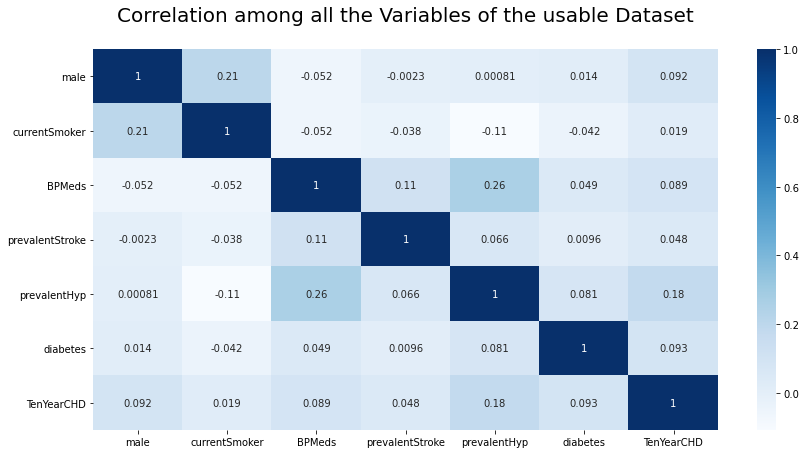

In [22]:
cor=data_cor.corr()
plt.figure(figsize=(14,7), facecolor='w')
sns.heatmap(cor,xticklabels=cor.columns,yticklabels=cor.columns,annot=True,cmap="Blues")
plt.title("Correlation among all the Variables of the usable Dataset\n", size=20)
cor

# Cruce de variables y sus gráficos

Text(0.5, 1.0, 'Diabetes')

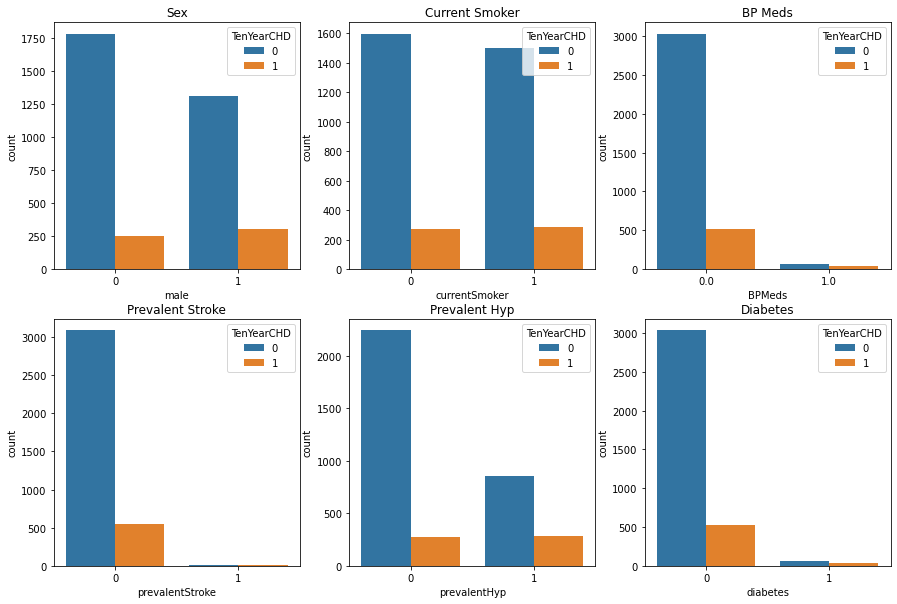

In [23]:
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
fig.suptitle('')

sns.countplot(ax=axes[0,0], x="male", hue="TenYearCHD", data=data)
axes[0,0].set_title('Sex')

sns.countplot(ax=axes[0,1], x="currentSmoker", hue="TenYearCHD", data=data)
axes[0,1].set_title('Current Smoker')

sns.countplot(ax=axes[0,2], x="BPMeds", hue="TenYearCHD", data=data)
axes[0,2].set_title('BP Meds')

sns.countplot(ax=axes[1,0], x="prevalentStroke", hue="TenYearCHD", data=data)
axes[1,0].set_title('Prevalent Stroke')

sns.countplot(ax=axes[1,1], x="prevalentHyp", hue="TenYearCHD", data=data)
axes[1,1].set_title('Prevalent Hyp')

sns.countplot(ax=axes[1,2], x="diabetes", hue="TenYearCHD", data=data)
axes[1,2].set_title('Diabetes')

# Different Predictive Models

***Métricas***

* Precision (Precisión)
Con la métrica de precisión podemos medir la calidad del modelo de machine learning en tareas de clasificación.


* Specificity (Especificidad) 
La especificidad es la métrica que evalúa la capacidad de un modelo para predecir los verdaderos negativos de cada categoría disponible.


* Recall (Exhaustividad)
La métrica de exhaustividad nos va a informar sobre la cantidad que el modelo de machine learning es capaz de identificar. 


* F1
El valor F1 se utiliza para combinar las medidas de precision y recall en un sólo valor. Esto es práctico porque hace más fácil el poder comparar el rendimiento combinado de la precisión y la exhaustividad entre varias soluciones.


* Accuracy (Exactitud)
La exactitud (accuracy) mide el porcentaje de casos que el modelo ha acertado.


* Matriz de confusión
La Matriz de Confusión indica qué tipos de errores se cometen.


In [24]:
#Separamos nuestras variables features de nuestra variable target.
train_cols = ['male','currentSmoker', 'BPMeds', 'prevalentStroke', 'prevalentHyp', 'diabetes']
X = data[train_cols]
y = data['TenYearCHD']

In [25]:
#Entrenamos el modelo con el %40 de los datos.
train_x, test_x, train_y, test_y = train_test_split(X, y, test_size=0.4, random_state=1)

In [26]:
#Escalamos los datos.
from sklearn.preprocessing import StandardScaler
scaler = MinMaxScaler()
train_x = scaler.fit_transform(train_x)
test_x = scaler.transform(test_x)

In [27]:
#¿Cómo es la distribución de datos en Train y Test?
#Lo que evaluamos es la proporción de clase 0 frente a la de clase 1. La clase 0 corresponde a personas que no poseen riesgo
#de contraer una enfermedad coronaria vs. a las personas que si poseen este riesgo.
train_y.value_counts(normalize=True)

0    0.840857
1    0.159143
Name: TenYearCHD, dtype: float64

In [28]:
test_y.value_counts(normalize=True)

0    0.857826
1    0.142174
Name: TenYearCHD, dtype: float64

In [29]:
#Podemos observar que se mantiene una proporción similar entre la clase positiva y la clase negativa. Esto nos garantiza
#que la evaluación va a tener un resultado correcto.

***Acerca de nuestra matriz de confusión***

* TP:Los verdaderos positivos son los casos en los que nuestro modelo ha detectado bien quienes potencialmente NO contraerían una enfermedad coronaria.

* PF:Los falsos positivos se refiere a quienes nuestro modelo predijo que NO poseen riesgo de contraer una enfermedad coronaria, pero en realidad se encuentran en riesgo.

* FN:Los falsos negativos son quiénes nuestro modelo detecto que poseen riesgo de contraer una enfermedad coronaria, pero en realidad NO se encuentran en riesgo.

* TN: Los verdaderos negativos son los casos en los que nuestro modelo predijo bien quiénes poseen riesgo de contraer una enfermedad coronaria.

* **Regresión Logística**

In [30]:
lm1 = 'LogisticRegression'
lr = LogisticRegression(random_state=1, max_iter=1000)
model = lr.fit(train_x, train_y)
lr_predict = lr.predict(test_x)
probs = lr.predict_proba(test_x)
lr_conf_matrix = confusion_matrix(test_y, lr_predict)
lr_acc_score = accuracy_score(test_y, lr_predict)
specificity1 = lr_conf_matrix[1,1]/(lr_conf_matrix[1,0]+lr_conf_matrix[1,1])
print("confusion matrix")
print(lr_conf_matrix)
print("\n")
print("Accuracy of Logistic Regression:",lr_acc_score*100,'\n')
print('Specificity : ', specificity1)
print("\n")
print(classification_report(test_y,lr_predict))

confusion matrix
[[1247    8]
 [ 203    5]]


Accuracy of Logistic Regression: 85.57758031442242 

Specificity :  0.02403846153846154


              precision    recall  f1-score   support

           0       0.86      0.99      0.92      1255
           1       0.38      0.02      0.05       208

    accuracy                           0.86      1463
   macro avg       0.62      0.51      0.48      1463
weighted avg       0.79      0.86      0.80      1463



* **El 0 indica el total de casos positivos y el 1 indica el total de casos negativos**

* **Accuracy** nos indica la proporción de clases correctamente clasificadas. Cuanto clasifico bien las clases negativas y las clases positivas. El modelo clasificó bien el %85,57 de los datos. Lo que no nos dice es cuantos verdaderos positivos y verdaderos negativos tenemos. Por lo tanto, la información que nos brinda es incompleta al momento de derivar a un paciente a tratamiento con determinada urgencia. 

* **Specificity** Indica cuán bien el modelo está realizando una predicción de los casos negativos reales. En este caso es de %2, por lo tanto, concluímos en que nuestro modelo no es específico al momento de clasificar casos positivos.

* **Precision** Nos indica la proporción de casos negativos correctamente predichos al igual que recall, pero sobre el total de casos predichos. Para los casos negativos nuestro modelo es mucho más preciso que para los casos positivos. 

* **Recall** Nos indica cuántos casos negativos fueron predichos correctamente, sobre el total de casos negativos reales. Esta medida nos indica cuan sensible es nuestro modelo a los casos negativos. 

* **F1 Score** Es una medida armónica entre Recall y Precision. Parece arrojarnos un valor esperable en relación al análisis que veníamos realizando.

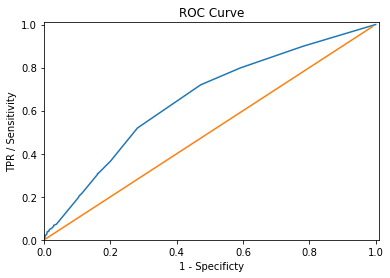

In [31]:
fpr,tpr,_ = roc_curve(test_y, probs[:,1])
df = pd.DataFrame(dict(fpr=fpr, tpr=tpr))
plt.axis([0, 1.01, 0, 1.01])
plt.xlabel('1 - Specificty')
plt.ylabel('TPR / Sensitivity')
plt.title('ROC Curve')
plt.plot(df['fpr'],df['tpr'])
plt.plot(np.arange(0,1, step =0.01), np.arange(0,1, step =0.01))
plt.show() 

In [32]:
#Área bajo la curva
auc(fpr,tpr)

0.6517755899479007

* **KNN**

In [33]:
m_knn = 'KNeighborsClassifier'
knn = KNeighborsClassifier(n_neighbors=1)
model = knn.fit(train_x, train_y)
knn_predict = knn.predict(test_x)
y_probs_knn = knn.predict_proba(test_x)
knn_conf_matrix = confusion_matrix(test_y, knn_predict)
knn_acc_score = accuracy_score(test_y, knn_predict)
specificity2 = knn_conf_matrix[1,1]/(knn_conf_matrix[1,0]+knn_conf_matrix[1,1])
print("confusion matrix")
print(knn_conf_matrix)
print("\n")
print("Accuracy of k-NN Classification:",knn_acc_score*100,'\n')
print('Specificity : ', specificity2 )
print("\n")
print(classification_report(test_y, knn_predict))

confusion matrix
[[1237   18]
 [ 198   10]]


Accuracy of k-NN Classification: 85.23581681476419 

Specificity :  0.04807692307692308


              precision    recall  f1-score   support

           0       0.86      0.99      0.92      1255
           1       0.36      0.05      0.08       208

    accuracy                           0.85      1463
   macro avg       0.61      0.52      0.50      1463
weighted avg       0.79      0.85      0.80      1463



* **El 0 indica el total de casos positivos y el 1 indica el total de casos negativos**

* **Accuracy** nos indica la proporción de clases correctamente clasificadas. Cuanto clasifico bien las clases negativas y las clases positivas. El modelo clasificó bien el %85,23 de los datos. Lo que no nos dice es cuantos verdaderos positivos y verdaderos negativos tenemos. Por lo tanto, la información que nos brinda es incompleta al momento de derivar a un paciente a tratamiento con determinada urgencia. 

* **Specificity** Indica cuán bien el modelo está realizando una predicción de los casos negativos reales. En este caso es de %4, por lo tanto, concluímos en que nuestro modelo no es específico al momento de clasificar casos positivos.

* **Precision** Nos indica la proporción de casos negativos correctamente predichos al igual que recall, pero sobre el total de casos predichos. Para los casos negativos nuestro modelo es mucho más preciso que para los casos positivos. 

* **Recall** Nos indica cuántos casos negativos fueron predichos correctamente, sobre el total de casos negativos reales. Esta medida nos indica cuan sensible es nuestro modelo a los casos negativos. 

* **F1 Score** Es una medida armónica entre Recall y Precision. Parece arrojarnos un valor esperable en relación al análisis que veníamos realizando.

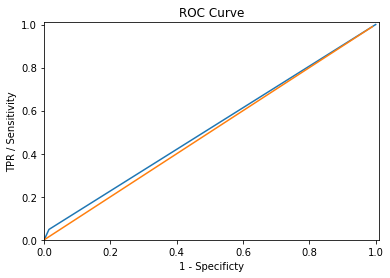

In [34]:
knn_fpr,knn_tpr,knn_ = roc_curve(test_y, y_probs_knn[:,1])
df = pd.DataFrame(dict(fpr=knn_fpr, tpr=knn_tpr))
plt.axis([0, 1.01, 0, 1.01])
plt.xlabel('1 - Specificty')
plt.ylabel('TPR / Sensitivity')
plt.title('ROC Curve')
plt.plot(df['fpr'],df['tpr'])
plt.plot(np.arange(0,1, step =0.01), np.arange(0,1, step =0.01))
plt.show() 

In [35]:
#Área bajo la curva
auc(knn_fpr,knn_tpr)

0.5168671467974257

* **Naive Bayes**

In [36]:
m_nb = 'Naive Bayes Classifier'
nbc = GaussianNB()
nbc.fit(train_x,train_y)
nbc_predicted = nbc.predict(test_x)
y_probs_nb = nbc.predict_proba(test_x)
nbc_conf_matrix = confusion_matrix(test_y, nbc_predicted)
nbc_acc_score = accuracy_score(test_y, nbc_predicted)
specificity3 = nbc_conf_matrix[1,1]/(nbc_conf_matrix[1,0]+nbc_conf_matrix[1,1])
print("confusion matrix")
print(nbc_conf_matrix)
print("\n")
print("Naive Bayes Classifier:",nbc_acc_score*100,'\n')
print('Specificity : ', specificity3 )
print("\n")
print(classification_report(test_y,nbc_predicted))

confusion matrix
[[1189   66]
 [ 187   21]]


Naive Bayes Classifier: 82.70676691729322 

Specificity :  0.10096153846153846


              precision    recall  f1-score   support

           0       0.86      0.95      0.90      1255
           1       0.24      0.10      0.14       208

    accuracy                           0.83      1463
   macro avg       0.55      0.52      0.52      1463
weighted avg       0.78      0.83      0.80      1463



* **El 0 indica el total de casos positivos y el 1 indica el total de casos negativos**

* **Accuracy** nos indica la proporción de clases correctamente clasificadas. Cuanto clasifico bien las clases negativas y las clases positivas. El modelo clasificó bien el %82,70 de los datos. Lo que no nos dice es cuantos verdaderos positivos y verdaderos negativos tenemos. Por lo tanto, la información que nos brinda es incompleta al momento de derivar a un paciente a tratamiento con determinada urgencia. 

* **Specificity** Indica cuán bien el modelo está realizando una predicción de los casos negativos reales. En este caso es de %10, por lo tanto, concluímos en que nuestro modelo no es específico al momento de clasificar casos positivos.

* **Precision** Nos indica la proporción de casos negativos correctamente predichos al igual que recall, pero sobre el total de casos predichos. Para los casos negativos nuestro modelo es mucho más preciso que para los casos positivos. 

* **Recall** Nos indica cuántos casos negativos fueron predichos correctamente, sobre el total de casos negativos reales. Esta medida nos indica cuan sensible es nuestro modelo a los casos negativos. 

* **F1 Score** Es una medida armónica entre Recall y Precision. Parece arrojarnos un valor esperable en relación al análisis que veníamos realizando.

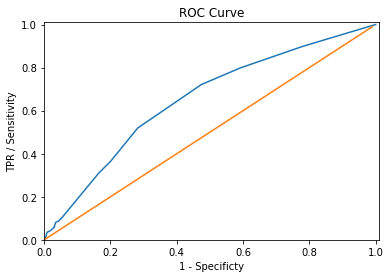

In [37]:
nb_fpr,nb_tpr,nb_ = roc_curve(test_y, y_probs_nb[:,1])
df = pd.DataFrame(dict(fpr=nb_fpr, tpr=nb_tpr))
plt.axis([0, 1.01, 0, 1.01])
plt.xlabel('1 - Specificty')
plt.ylabel('TPR / Sensitivity')
plt.title('ROC Curve')
plt.plot(df['fpr'],df['tpr'])
plt.plot(np.arange(0,1, step =0.01), np.arange(0,1, step =0.01))
plt.show() 

In [38]:
#Área bajo la curva
auc(nb_fpr,nb_tpr)

0.6512507661661049

# Balanceamos y predecimos

In [39]:
# Resampling
target1=data[data['TenYearCHD']==1]
target0=data[data['TenYearCHD']==0]

In [40]:
target1=resample(target1,replace=True,n_samples=len(target0),random_state=40)
target=pd.concat([target0,target1])
target['TenYearCHD'].value_counts() 


data=target
np.shape(data)

(6198, 16)

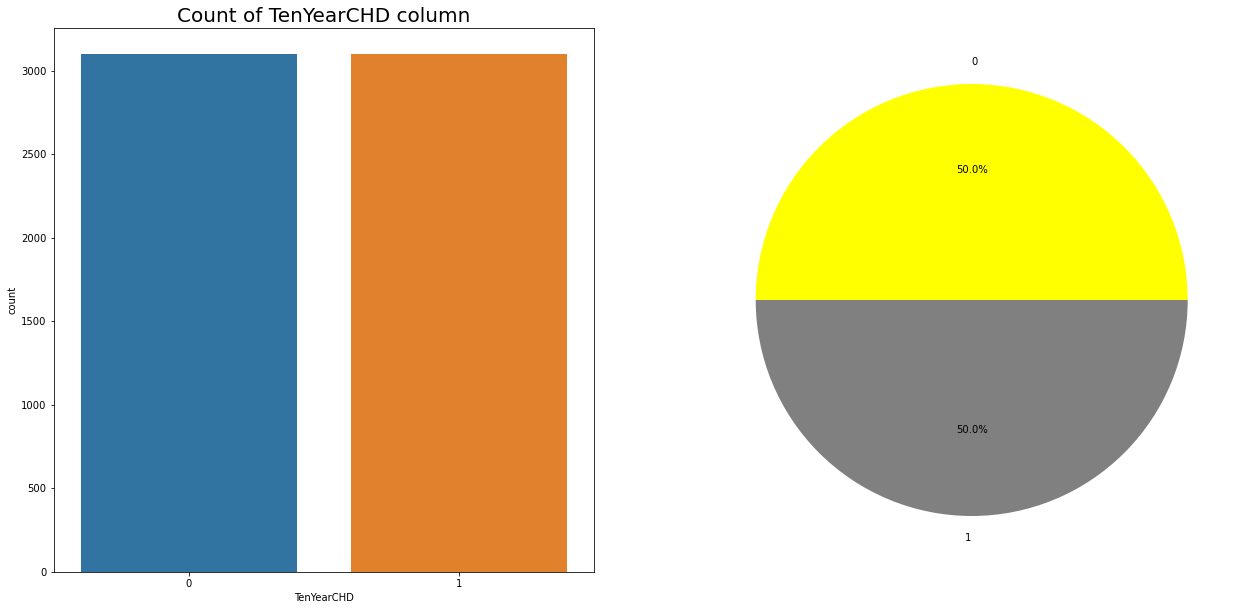

In [41]:
#Distribution of heart disease cases in the balanced dataset, the outcome variable
plt.figure(figsize=(12, 10), facecolor='w')
plt.subplots_adjust(right=1.5)
plt.subplot(121)
sns.countplot(x="TenYearCHD", data=data)
plt.title("Count of TenYearCHD column", size=20)
plt.subplot(122)
labels=[0,1]
plt.pie(data["TenYearCHD"].value_counts(),autopct="%1.1f%%",labels=labels,colors=["yellow","grey"])
plt.show()

In [42]:
#To idenfify the features that have larger contribution towards the outcome variable, TenYearCHD
X1=data.iloc[:,0:15]
y1=data.iloc[:,-1]
print("X - ", X.shape, "\ny - ", y.shape)

X -  (3656, 6) 
y -  (3656,)


In [43]:
y1 = data['TenYearCHD']
X1 = data.drop(['TenYearCHD'], axis=1)
train_x1, test_x1, train_y1, test_y1 = train_test_split(X1, y1, test_size=0.4, random_state=1)

In [44]:
scaler = MinMaxScaler()
train_x1 = scaler.fit_transform(train_x1)
test_x1 = scaler.transform(test_x1)

In [45]:
lm1 = 'LogisticRegression'
lr = LogisticRegression(random_state=1, max_iter=1000)
model = lr.fit(train_x1, train_y1)
lr_predict = lr.predict(test_x1)
lr_conf_matrix = confusion_matrix(test_y1, lr_predict)
lr_acc_score = accuracy_score(test_y1, lr_predict)
specificity4 = lr_conf_matrix[1,1]/(lr_conf_matrix[1,0]+lr_conf_matrix[1,1])
print("confusion matrix")
print(lr_conf_matrix)
print("\n")
print("Accuracy of Logistic Regression:",lr_acc_score*100,'\n')
print('Specificity : ', specificity4 )
print("\n")
print(classification_report(test_y1,lr_predict))

confusion matrix
[[839 402]
 [387 852]]


Accuracy of Logistic Regression: 68.18548387096774 

Specificity :  0.6876513317191283


              precision    recall  f1-score   support

           0       0.68      0.68      0.68      1241
           1       0.68      0.69      0.68      1239

    accuracy                           0.68      2480
   macro avg       0.68      0.68      0.68      2480
weighted avg       0.68      0.68      0.68      2480



In [46]:
m_knn = 'KNeighborsClassifier'
knn = KNeighborsClassifier(n_neighbors=1)
model = knn.fit(train_x1, train_y1)
knn_predict = knn.predict(test_x1)
knn_conf_matrix = confusion_matrix(test_y1, knn_predict)
knn_acc_score = accuracy_score(test_y1, knn_predict)
specificity5 = knn_conf_matrix[1,1]/(knn_conf_matrix[1,0]+knn_conf_matrix[1,1])
print("confusion matrix")
print(knn_conf_matrix)
print("\n")
print("Accuracy of k-NN Classification:",knn_acc_score*100,'\n')
print('Specificity : ', specificity5 )
print("\n")
print(classification_report(test_y1, knn_predict))

confusion matrix
[[1011  230]
 [  40 1199]]


Accuracy of k-NN Classification: 89.11290322580645 

Specificity :  0.9677158999192897


              precision    recall  f1-score   support

           0       0.96      0.81      0.88      1241
           1       0.84      0.97      0.90      1239

    accuracy                           0.89      2480
   macro avg       0.90      0.89      0.89      2480
weighted avg       0.90      0.89      0.89      2480



In [47]:
m_nb = 'Naive Bayes Classifier'
nbc = GaussianNB()
nbc.fit(train_x1,train_y1)
nbc_predicted = nbc.predict(test_x1)
nbc_conf_matrix = confusion_matrix(test_y1, nbc_predicted)
nbc_acc_score = accuracy_score(test_y1, nbc_predicted)
specificity6 = nbc_conf_matrix[1,1]/(nbc_conf_matrix[1,0]+nbc_conf_matrix[1,1])
print("confusion matrix")
print(nbc_conf_matrix)
print("\n")
print("Naive Bayes Classifier:",nbc_acc_score*100,'\n')
print('Specificity : ', specificity6 )
print("\n")
print(classification_report(test_y1,nbc_predicted))

confusion matrix
[[1099  142]
 [ 844  395]]


Naive Bayes Classifier: 60.24193548387097 

Specificity :  0.3188054882970137


              precision    recall  f1-score   support

           0       0.57      0.89      0.69      1241
           1       0.74      0.32      0.44      1239

    accuracy                           0.60      2480
   macro avg       0.65      0.60      0.57      2480
weighted avg       0.65      0.60      0.57      2480



In [48]:
lr_false_positive_rate,lr_true_positive_rate,lr_threshold = roc_curve(test_y1,lr_predict)
knn_false_positive_rate,knn_true_positive_rate,knn_threshold = roc_curve(test_y1,knn_predict)
nbc_false_positive_rate,nbc_true_positive_rate,nbc_threshold = roc_curve(test_y1,nbc_predicted)


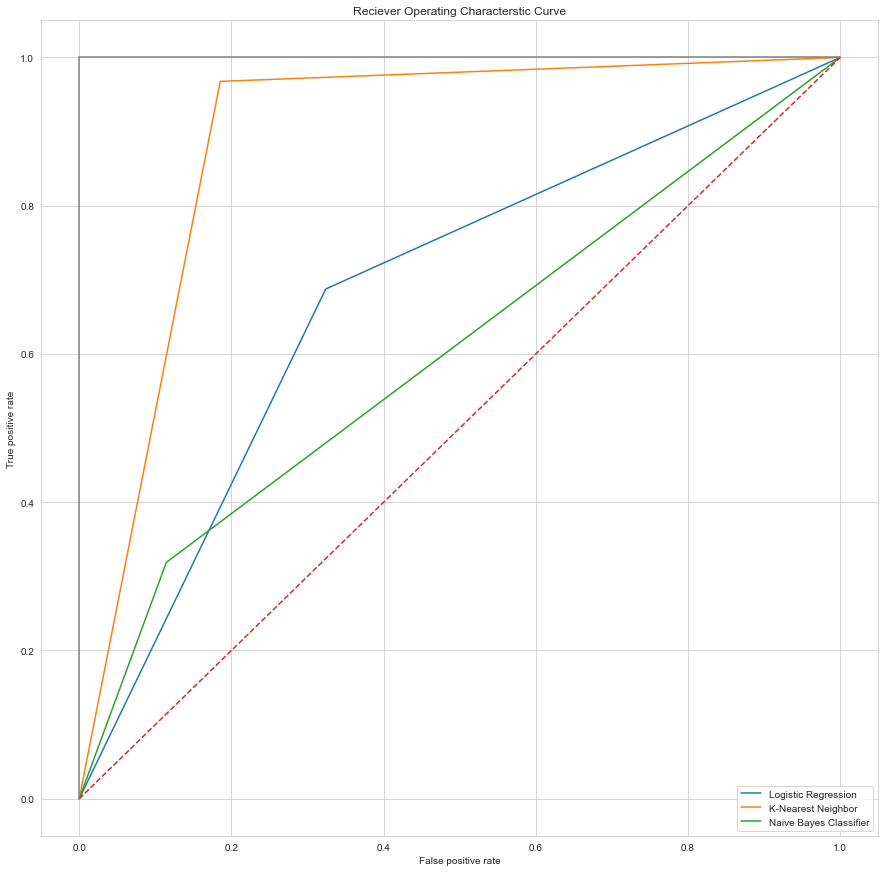

In [49]:
sns.set_style('whitegrid')
plt.figure(figsize=(15,15), facecolor='w')
plt.title('Reciever Operating Characterstic Curve')
plt.plot(lr_false_positive_rate,lr_true_positive_rate,label='Logistic Regression')
plt.plot(knn_false_positive_rate,knn_true_positive_rate,label='K-Nearest Neighbor')
plt.plot(nbc_false_positive_rate,nbc_true_positive_rate,label='Naive Bayes Classifier')
plt.plot([0,1],ls='--')
plt.plot([0,0],[1,0],c='.5')
plt.plot([1,1],c='.5')
plt.ylabel('True positive rate')
plt.xlabel('False positive rate')
plt.legend()
plt.show()

In [51]:
auc_lr = auc(lr_false_positive_rate,lr_true_positive_rate)
auc_knn = auc(knn_false_positive_rate,knn_true_positive_rate)
auc_nbc = auc(nbc_false_positive_rate,nbc_true_positive_rate)
print('Área bajo la curva en LR: ', auc_lr)
print('Área bajo la curva en KNN: ', auc_knn)
print('Área bajo la curva en NB: ', auc_nbc)

Área bajo la curva en LR:  0.6818595095340203
Área bajo la curva en KNN:  0.8911907460917964
Área bajo la curva en NB:  0.60219081828227


**Conclusiones en base a los modelos con datos balanceados**

Al balancear el modelo observamos que el Accuracy en los modelos de regresión lógica y naive bayes disminuyo. Aún así se observa que las métricas de precision, recall y F1 mejoraron.

El modelo que mejoró notablemente y tuvo la mejor performance de todos los testeados fue el KNN con datos balanceados. Este modelo es el que logró una mejor precisión y sensibilidad al momento de clasificar datos positivos, como datos negativos.

**Conclusiones**

* Al balancear el modelo observamos que el Accuracy en los modelos de regresión logística y Naive Bayes disminuyó. Aún así se observa que las métricas de precisión, recall y F1 mejoraron.

* El modelo que mejoró notablemente y tuvo la mejor performance de todos los testeados fue el KNN con datos balanceados. Este modelo es el que logró una mejor precisión y sensibilidad al momento de clasificar datos positivos, como datos negativos.

* Los hombres parecerían ser más susceptibles a padecer enfermedades cardíacas que las mujeres. 

* Aumentando la edad, cantidad de cigarrillos fumados por día y la presión sistólica aumentaría también la probabilidad de padecer enfermedades cardíacas.

* Se eligió el modelo KNN Balanceado para predecir ya que el accuracy es de 89%.

* El modelo es más específico que sensitivo.

* Todos los modelos podrían mejorar con más datos.